In [1]:
#import all dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px

In [2]:
#Importing the dataset
data_df=pd.read_csv('new_train.csv')
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [3]:
#Cleaning the datset by removing "unknown" from education, marital, job, default, housing and loan columns
final_df=data_df.loc[(data_df['education']!='unknown') & (data_df['marital']!='unknown') & (data_df['job']!='unknown')  & (data_df['default']!='unknown') & (data_df['housing']!='unknown') & (data_df['loan']!='unknown')]
final_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


C:\Users\Sheryl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sheryl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sheryl\AppData\Local\Temp/ipykernel_42536/3906075459.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


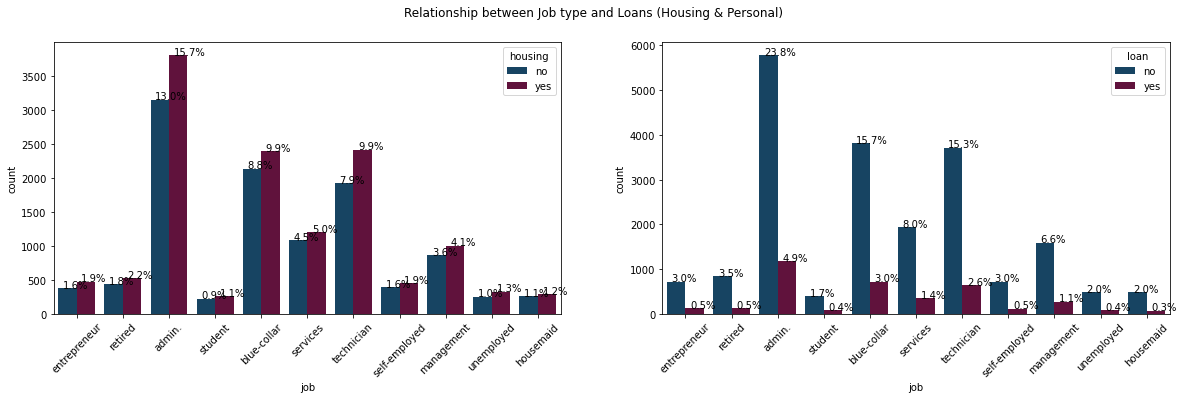

In [4]:
#Plots displaying the relationship between job type and loans(personal & housing)
f, a =plt.subplots(1,2,figsize=(20,5))
plt.suptitle("Relationship between Job type and Loans (Housing & Personal)")
second=sns.countplot(final_df['job'],hue=final_df["housing"], ax=a[0],palette=['#0A476E',"#6D053D"])
second.set_xticklabels(second.get_xticklabels(), rotation=45)
first=sns.countplot(final_df['job'],hue=final_df["loan"], ax=a[1],palette=['#0A476E',"#6D053D"])
first.set_xticklabels(first.get_xticklabels(), rotation=45)
for r in first.patches:
        first.annotate('{:.1f}%'.format(100*r.get_height()/24305), (r.get_x()+0.1, r.get_height()+5))
for r in second.patches:
        second.annotate('{:.1f}%'.format(100*r.get_height()/24305), (r.get_x()+0.1, r.get_height()+5))

f.show()

From the above graphs we can see that there are two kinds of loans: Personal Loans and Housing Loans

The graph on the left shows the relationship between the job holders and the house loans. By looking at the graph it is evident that admins form the majority jobtype and they take maximum number of housing loans. Whereas the student takes least number of housing loans for obvious reasons.
    The second graph shows the relationship between the job holders and the personal loans. We can see that, a large number of admins,blue-collars and technicians have not taken the personal loans. Comparing both the graphs we understand that more number of housing loans have been taken over personal loans.

In [5]:
#Categorizing the age into groups
age_df=final_df.copy()
age_df['age_groups'] = pd.cut(x=age_df['age'], bins=[9, 19, 29, 39,49,59,69,79,89,99])
age_df[['job','age','age_groups']]

,job,age,age_groups
1,entrepreneur,37,"(29, 39]"
2,retired,78,"(69, 79]"
3,admin.,36,"(29, 39]"
4,retired,59,"(49, 59]"
5,admin.,29,"(19, 29]"
...,...,...,...
32945,services,28,"(19, 29]"
32946,technician,52,"(49, 59]"
32947,admin.,54,"(49, 59]"
32948,admin.,29,"(19, 29]"


C:\Users\Sheryl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sheryl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sheryl\AppData\Local\Temp/ipykernel_42536/3922196836.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


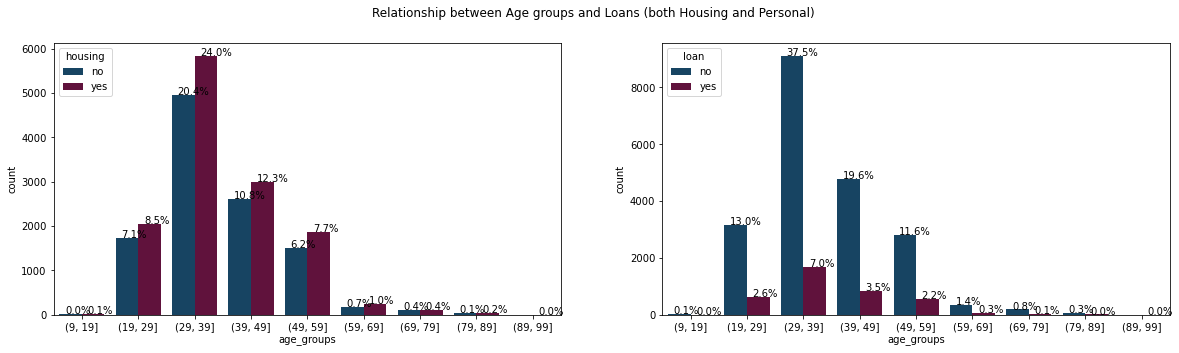

In [6]:
#Plotting the relationship between age groups and loans (both Personal and Housing)
f, a =plt.subplots(1,2,figsize=(20,5))
plt.suptitle("Relationship between Age groups and Loans (both Housing and Personal)")

fourth=sns.countplot(age_df['age_groups'], hue=age_df["housing"],ax=a[0],palette=['#0A476E',"#6D053D"])
third=sns.countplot(age_df['age_groups'], hue=final_df["loan"],ax=a[1],palette=['#0A476E',"#6D053D"])

for r in third.patches:
        third.annotate('{:.1f}%'.format(100*r.get_height()/24305), (r.get_x()+0.1, r.get_height()+5))
for r in fourth.patches:
        fourth.annotate('{:.1f}%'.format(100*r.get_height()/24305), (r.get_x()+0.1, r.get_height()+5))
f.show()

These graphs show the relationship between the age_groups and types of loans:

From the first graph we can say that a majority of the housing loans have been taken by the job holders in the age_group (29-39) and no housing loans are taken in the age_group (89-99). 
Coming to the personal loans, a large number of people in the age group (19-59) have not taken personal loans.

In [7]:
#creating a dataframe with desired columns
geom_df=final_df[['job','housing','loan','age']]
geom_df

,job,housing,loan,age
1,entrepreneur,no,no,37
2,retired,no,no,78
3,admin.,yes,no,36
4,retired,no,no,59
5,admin.,no,no,29
...,...,...,...,...
32945,services,yes,no,28
32946,technician,yes,no,52
32947,admin.,no,yes,54
32948,admin.,no,no,29


In [8]:
#Verifying the values on the heatmap for housing loans
verify_housing=final_df.loc[(final_df['job'] == 'housemaid') & (final_df['age']>49) & (final_df['age']<=59)]
verify_housing[['housing']].mode()

,housing
0,no


In [9]:
#Verifying the values on the heatmap for personal loans
verify_loan=final_df.loc[(final_df['job'] == 'blue-collar') & (final_df['age']>69) & (final_df['age']<=79)]
verify_loan[['loan']].mode()

,loan
0,yes


In [10]:
#Label Encoding the Housing and Personal Loans to use in the heat map

encoding=LabelEncoder()
geom_df['housing_N']=encoding.fit_transform(geom_df['housing'])
geom_df['loan_N']=encoding.fit_transform(geom_df['loan'])
geom_df['age_groups'] = pd.cut(x=age_df['age'], bins=[9, 19, 29, 39,49,59,69,79,89,99])
geom_df["loan"].value_counts()

C:\Users\Sheryl\AppData\Local\Temp/ipykernel_42536/3875747446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geom_df['housing_N']=encoding.fit_transform(geom_df['housing'])
C:\Users\Sheryl\AppData\Local\Temp/ipykernel_42536/3875747446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geom_df['loan_N']=encoding.fit_transform(geom_df['loan'])
C:\Users\Sheryl\AppData\Local\Temp/ipykernel_42536/3875747446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

no     20491
yes     3814
Name: loan, dtype: int64

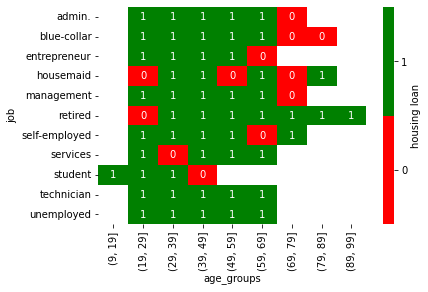

In [11]:
#Generating the heatmap for how job type and age groups affect whether or housing loan was taken
color_list = ["red", "green"] 
color = LinearSegmentedColormap.from_list('Custom', color_list, len(color_list))

housing_heatmap = geom_df.pivot_table(values='housing_N',index='job',columns='age_groups',aggfunc=lambda x: x.mode().iat[0])
housing = sns.heatmap(housing_heatmap,annot=True,cmap=color)

cb = housing.collections[0].colorbar
cb.set_ticks([0.25,0.75])
cb.set_ticklabels(['0', '1'])
cb.set_label('housing loan')

plt.show()

The above figure shows the heatmap depicting whether or not a person takes a housing loan on the basis of their job type and age_group.

The example executed in the code block 8, verifies the heatmap which shows that a housemaid in the age group from (49-59) doesnt have a housing loan.
Similarly, from the heat map we can see that a technician of the age group (29-39) has a housing loan.

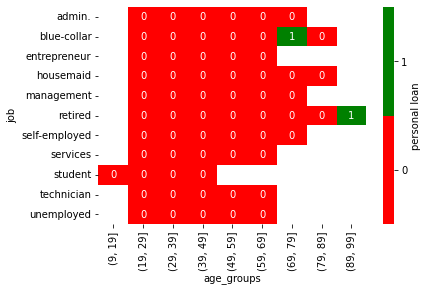

In [12]:
#Generating the heatmap for how job type and age groups affect whether or personal loan was taken
color_list = ["red", "green"] 
color = LinearSegmentedColormap.from_list('Custom', color_list, len(color_list))

loan_heatmap = geom_df.pivot_table(values='loan_N',index='job',columns='age_groups',aggfunc=lambda x: x.mode().iat[0])
loan = sns.heatmap(loan_heatmap,cmap=color,annot=True)

cb = loan.collections[0].colorbar
cb.set_ticks([0.25,0.75])
cb.set_ticklabels(['0', '1'])
cb.set_label('personal loan')

plt.show()

From this heat map, we analyse how the job type and the age_groups affects whether a person takes a personal loan or not.

The code block 9 verifies the heatmap, because blue-collar professionals belonging to the age group (69-79) have taken the personal loan.
From the heatmap we can see that a student of the age_group (9-19) doesnt take a personal loan.

In [14]:
#Verifying the kind of loans taken (depending on job type and age group)  on the basis of above heatmaps
output=final_df.loc[(final_df['job'] == 'entrepreneur') & (final_df['age']>29) & (final_df['age']<=39)]
output[['housing','loan']].mode()

,housing,loan
0,yes,no


Let us look at both the heatmaps for entrepreneurs whose age is in the range(29-39).From the maps, we see that they have taken a housing loan but have not taken a personal loan which is verified by the code block above. 

Hence the above data analysis helps us identify the kind of loans a person takes on the basis of his/her job type and age criteria.